In [1]:
import numpy as np
import mlrose_hiive
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
import matplotlib.pyplot as plt
import time
import random

# Travelling Saleperson Problems

In [2]:
N=50
coords_list = [[0 for x in range(2)] for x in range(N)]
for i in range(0, len(coords_list)):
    coords_list[i][0] = random.random()
    coords_list[i][1] = random.random()
    
fitness_coords = mlrose_hiive.TravellingSales(coords=coords_list)

problem_no_fit = mlrose_hiive.TSPOpt(length=N, fitness_fn=fitness_coords, maximize=True)

# Randoom Hill Climbing

In [3]:
best_state_HC0, best_fitness_HC0, fitness_curve_HC0 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=0, 
                                                                         init_state=None, curve=True, random_state=1)

best_state_HC10, best_fitness_HC10, fitness_curve_HC10 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=10, 
                                                                         init_state=None, curve=True, random_state=2)

best_state_HC30, best_fitness_HC30, fitness_curve_HC30 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=30, 
                                                                         init_state=None, curve=True, random_state=3)

best_state_HC50, best_fitness_HC50, fitness_curve_HC50 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=50, 
                                                                         init_state=None, curve=True, random_state=4)
best_state_HC100, best_fitness_HC100, fitness_curve_HC100 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=100, 
                                                                         init_state=None, curve=True, random_state=5)
best_state_HC150, best_fitness_HC150, fitness_curve_HC150 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=150, 
                                                                         init_state=None, curve=True, random_state=6)
best_state_HC200, best_fitness_HC200, fitness_curve_HC200 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=200, 
                                                                         init_state=None, curve=True, random_state=7)
best_state_HC250, best_fitness_HC250, fitness_curve_HC250 = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=250, 
                                                                         init_state=None, curve=True, random_state=8)

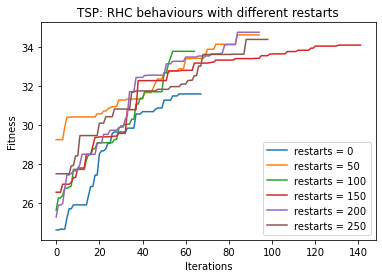

In [4]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_HC0))),fitness_curve_HC0[...,0],'-',label='restarts = 0')  # Plot some data on the axes.
#ax.plot(range(0,len(list(fitness_curve_HC5))),-fitness_curve_HC5[...,0],'-',label='restarts = 5')  # Plot more data on the axes...
#ax.plot(range(0,len(list(fitness_curve_HC10))),fitness_curve_HC10[...,0],'-',label='restarts = 10')  # ... and some more.
#ax.plot(range(0,len(list(fitness_curve_HC15))),-fitness_curve_HC15[...,0],'-',label='restarts = 15')  # ... and some more.
#ax.plot(range(0,len(list(fitness_curve_HC30))),fitness_curve_HC30[...,0],'-',label='restarts = 30')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_HC50))),fitness_curve_HC50[...,0],'-',label='restarts = 50')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_HC100))),fitness_curve_HC100[...,0],'-',label='restarts = 100')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_HC150))),fitness_curve_HC150[...,0],'-',label='restarts = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_HC200))),fitness_curve_HC200[...,0],'-',label='restarts = 200')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_HC250))),fitness_curve_HC250[...,0],'-',label='restarts = 250')  # ... and some more.

ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP: RHC behaviours with different restarts")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [5]:
print(best_fitness_HC0)
print(best_fitness_HC10)
print(best_fitness_HC30)
print(best_fitness_HC50)
print(best_fitness_HC100)
print(best_fitness_HC150)
print(best_fitness_HC200)
print(best_fitness_HC250)

31.599579343952534
33.01306666536384
33.30754344942976
34.61951912122982
33.77759234095453
34.09500968315318
34.75324423907402
34.38556080700618


In [6]:
startHC10 = time.time()

best_state_RHC_best, best_fitness_RHC_best, fitness_curve_RHC_best = mlrose_hiive.random_hill_climb(problem_no_fit, max_attempts=10, max_iters=1000, restarts=100, 
                                                                         init_state=None, curve=True, random_state=5)
endHC10 = time.time()
HCtime = endHC10 - startHC10
print(HCtime)
print(best_fitness_RHC_best)

0.5720014572143555
33.77759234095453


# simulated annealing

In [7]:
# Solve using simulated annealing - attempt 1
schedule_SA = mlrose_hiive.GeomDecay(init_temp=1, decay=0.95, min_temp=0.01)
best_state_SA_GeomDecay, best_fitness_SA_GeomDecay, fitness_curve_SA_GeomDecay = mlrose_hiive.simulated_annealing(problem_no_fit, schedule=schedule_SA, 
                                                      max_attempts=10, max_iters=1000, init_state=None, curve=True, random_state=1)
                                                                              
# tune temperature
schedule_arith =mlrose_hiive.ArithDecay(init_temp=1, decay=0.95, min_temp=0.01)
best_state_SA_arith, best_fitness_SA_arith, fitness_curve_SA_arith = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith, 
                                                      max_attempts = 10,max_iters = 1000, init_state=None, curve=True,random_state = 2)
                                                      
schedule_exp =mlrose_hiive.ExpDecay(init_temp=1, exp_const=0.05, min_temp=0.01)
best_state_SAexp, best_state_SAexp, fitness_curve_SAexp = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True, random_state = 3)
                                                      

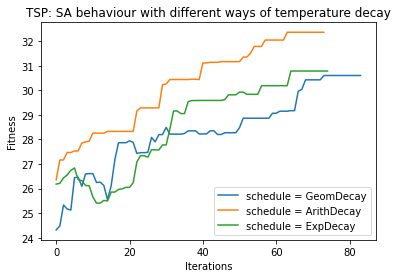

In [8]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_SA_GeomDecay))),fitness_curve_SA_GeomDecay[...,0],'-',label='schedule = GeomDecay')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SA_arith))),fitness_curve_SA_arith[...,0],'-',label='schedule = ArithDecay')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_SAexp))),fitness_curve_SAexp[...,0],'-',label='schedule = ExpDecay')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP: SA behaviour with different ways of temperature decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [9]:
print(best_fitness_SA_GeomDecay)
print(best_fitness_SA_arith)
print(best_state_SAexp)

30.601720071518454
32.36201144454167
30.78394374918852


In [10]:
# tune temperature decay
schedule_arith2 =mlrose_hiive.ArithDecay(init_temp=1, decay=0.5, min_temp=0.01)
best_state_SAarith2, best_fitness_SAarith2, fitness_curve_SAarith2 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith2, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 777777)
schedule_arith3 =mlrose_hiive.ArithDecay(init_temp=1, decay=0.1, min_temp=0.01)
best_state_SAarith3, best_fitness_SAarith3, fitness_curve_SAarith3 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith3, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 55555)

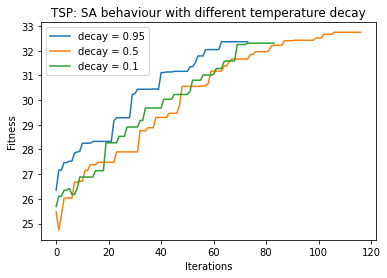

In [11]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_SA_arith))),fitness_curve_SA_arith[...,0],'-',label='decay = 0.95')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SAarith2))),fitness_curve_SAarith2[...,0],'-',label='decay = 0.5')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_SAarith3))),fitness_curve_SAarith3[...,0],'-',label='decay = 0.1')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP: SA behaviour with different temperature decay")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [12]:

schedule_arith4 =mlrose_hiive.ArithDecay(init_temp=0.1, decay=0.5, min_temp=0.01)
best_state_SAarith4, best_fitness_SAarith4, fitness_curve_SAarith4 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith4, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 888999)

schedule_arith5 =mlrose_hiive.ArithDecay(init_temp=0.5, decay=0.5, min_temp=0.01)
best_state_SAarith5, best_fitness_SAarith5, fitness_curve_SAarith5 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith5, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 8889)

schedule_arith6 =mlrose_hiive.ArithDecay(init_temp=2, decay=0.5, min_temp=0.01)
best_state_SAarith6, best_fitness_SAarith6, fitness_curve_SAarith6 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith6, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 8999)


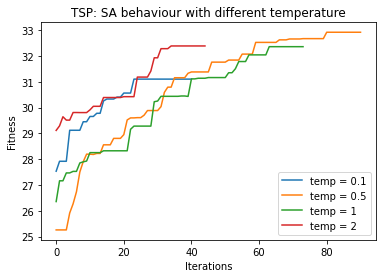

In [13]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_SAarith4))),fitness_curve_SAarith4[...,0],'-',label='temp = 0.1')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_SAarith5))),fitness_curve_SAarith5[...,0],'-',label='temp = 0.5')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SA_arith))),fitness_curve_SA_arith[...,0],'-',label='temp = 1')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_SAarith6))),fitness_curve_SAarith6[...,0],'-',label='temp = 2')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP: SA behaviour with different temperature")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [14]:
print(best_fitness_SAarith4)
print(best_fitness_SAarith5)
print(best_fitness_SA_arith)
print(best_fitness_SAarith6)

31.10491826650796
32.921419608363614
32.36201144454167
32.390033069957894


In [15]:
startSA = time.time()
schedule_arith_best =mlrose_hiive.ArithDecay(init_temp=1, decay=0.95, min_temp=0.01)
best_state_SA_best, best_state_SA_best, fitness_curve_SA_best = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_arith_best, 
                                                      max_attempts = 10,max_iters = 1000, init_state=None, curve=True,random_state = 2)
endSA = time.time()
SAtime = endSA - startSA
print(SAtime)
print(best_state_SA_best)

0.008001327514648438
32.36201144454167


# genetic algorithm

In [16]:
best_state_GA50, best_fitness_GA50, fitness_curve_GA50 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=50,
                                                                         max_attempts = 100, curve=True,random_state = 1)

In [17]:
best_state_GA100, best_fitness_GA100, fitness_curve_GA100 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=100,
                                                                         max_attempts = 100, curve=True,random_state = 2)

In [18]:
best_state_GA200, best_fitness_GA200, fitness_curve_GA200 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=200, 
                                                                         max_attempts = 100, curve=True, random_state = 3)


In [19]:
best_state_GA300, best_fitness_GA300, fitness_curve_GA300 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=300,
                                                                         max_attempts = 100, curve=True,random_state = 4)

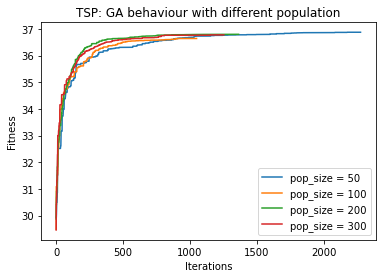

In [20]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_GA50))),fitness_curve_GA50[...,0],'-',label='pop_size = 50')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA100))),fitness_curve_GA100[...,0],'-',label='pop_size = 100')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA200))),fitness_curve_GA200[...,0],'-',label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_GA300))),fitness_curve_GA300[...,0],'-',label='pop_size = 300')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP: GA behaviour with different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [21]:
print(best_fitness_GA50)
print(best_fitness_GA100)
print(best_fitness_GA200)
print(best_fitness_GA300)

36.87305231600863
36.63891020550798
36.79557607606823
36.773519913879944


In [22]:
# Solve using genetic algorithm
best_state_GA_m2, best_fitness_GA_m2, fitness_curve_GA_m2 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.2, pop_size=200, max_attempts = 100, curve=True,
                                              random_state = 5)
best_state_GA_m5, best_fitness_GA_m5, fitness_curve_GA_m5 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.5, pop_size=200, max_attempts = 100, curve=True,
                                              random_state = 6)
best_state_GA_m8, best_fitness_GA_m8, fitness_curve_GA_m8 = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.8, pop_size=200, max_attempts = 100, curve=True,
                                              random_state = 7)

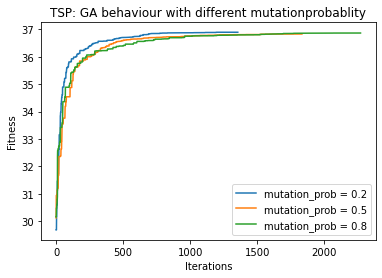

In [23]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_GA_m2))),fitness_curve_GA_m2[...,0],'-',label='mutation_prob = 0.2')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA_m5))),fitness_curve_GA_m5[...,0],'-',label='mutation_prob = 0.5')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_GA_m8))),fitness_curve_GA_m8[...,0],'-',label='mutation_prob = 0.8')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP: GA behaviour with different mutationprobablity")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [24]:
print(best_fitness_GA_m2)
print(best_fitness_GA_m5)
print(best_fitness_GA_m8)

36.898420632299334
36.834396537987175
36.869956604242255


In [25]:
startGA = time.time()
best_state_GA_best, best_fitness_GA_best, fitness_curve_GA_best = mlrose_hiive.genetic_alg(problem_no_fit, mutation_prob = 0.5, pop_size=200, max_attempts = 100, curve=True,
                                              random_state = 2)
endGA = time.time()
GAtime = endGA - startGA
print(GAtime)
print(best_fitness_GA_best)

37.98853874206543
36.76179239527233


# Mimic

In [26]:
best_state_mimic100, best_fitness_mimic100, fitness_curve_mimic100 = mlrose_hiive.mimic(problem_no_fit, pop_size=100, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=1)
best_state_mimic200, best_fitness_mimic200, fitness_curve_mimic200 = mlrose_hiive.mimic(problem_no_fit, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=2)
best_state_mimic300, best_fitness_mimic300, fitness_curve_mimic300 = mlrose_hiive.mimic(problem_no_fit, pop_size=300, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=3)
best_state_mimic400, best_fitness_mimic400, fitness_curve_mimic400 = mlrose_hiive.mimic(problem_no_fit, pop_size=400, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=4)
best_state_mimic500, best_fitness_mimic500, fitness_curve_mimic500 = mlrose_hiive.mimic(problem_no_fit, pop_size=500, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=5)

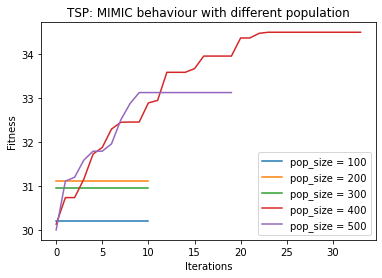

In [27]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_mimic100))),fitness_curve_mimic100[...,0],'-',label='pop_size = 100')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_mimic200))),fitness_curve_mimic200[...,0],'-',label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_mimic300))),fitness_curve_mimic300[...,0],'-',label='pop_size = 300')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_mimic400))),fitness_curve_mimic400[...,0],'-',label='pop_size = 400')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_mimic500))),fitness_curve_mimic500[...,0],'-',label='pop_size = 500')  # Plot some data on the axes.

ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP: MIMIC behaviour with different population")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [28]:
print(best_fitness_mimic100)
print(best_fitness_mimic200)
print(best_fitness_mimic300)
print(best_fitness_mimic400)
print(best_fitness_mimic500)

30.202410097579236
31.13107065124975
30.960479525996643
34.48954218802335
33.123253262618164


In [29]:
startMIMIC = time.time()

best_state_mimic_best, best_fitness_mimic_best, fitness_curve_mimic_best = mlrose_hiive.mimic(problem_no_fit, pop_size=400, keep_pct=0.2, max_attempts=10, 
                                                                   max_iters=1000, curve=True, random_state=4)
endMIMIC = time.time()
MIMICtime = endMIMIC - startMIMIC
print(MIMICtime)
print(best_fitness_mimic_best)

39.61881160736084
34.48954218802335


# Conclusion

In [30]:
print(best_fitness_RHC_best)
print(best_state_SA_best)
print(best_fitness_GA_best)
print(best_fitness_mimic_best)

33.77759234095453
32.36201144454167
36.76179239527233
34.48954218802335


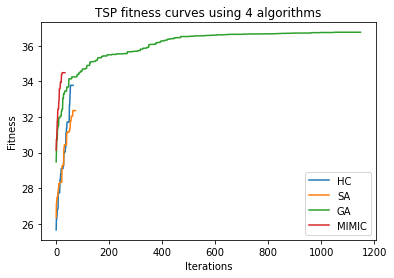

In [31]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_RHC_best))),fitness_curve_RHC_best[...,0],'-',label='HC')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_SA_best))),fitness_curve_SA_best[...,0],'-',label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_GA_best))),fitness_curve_GA_best[...,0],'-',label='GA')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_mimic_best))),fitness_curve_mimic_best[...,0],'-',label='MIMIC')
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("TSP fitness curves using 4 algorithms")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [32]:
runtime_list = [HCtime,SAtime,GAtime,MIMICtime]
print(runtime_list)
names = ["RHC", "SA","GA","MIMIC"]
print(names)

[0.5720014572143555, 0.008001327514648438, 37.98853874206543, 39.61881160736084]
['RHC', 'SA', 'GA', 'MIMIC']


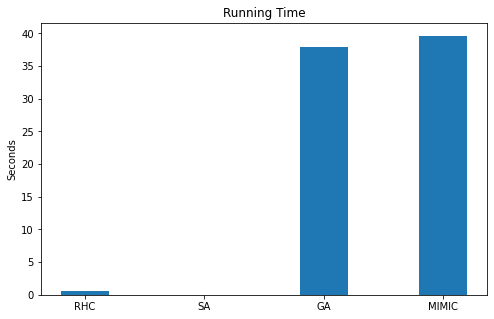

In [36]:
fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(names,runtime_list, width = 0.4)
plt.ylabel("Seconds")
plt.title("Running Time")
plt.show()

In [34]:
schedule_exp_1 =mlrose_hiive.ExpDecay(init_temp=1, exp_const=0.1, min_temp=0.01)
best_state_SA_exp_1, best_state_SA_exp_1, fitness_curve_SA_exp_1 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp_1, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,random_state = 555)

schedule_exp_5 =mlrose_hiive.ExpDecay(init_temp=1, exp_const=0.5, min_temp=0.01)
best_state_SA_exp_5, best_state_SA_exp_5, fitness_curve_SA_exp_5 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp_5, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,random_state = 666)
schedule_exp_11 =mlrose_hiive.ExpDecay(init_temp=1, exp_const=0.01, min_temp=0.01)
best_state_SA_exp_11, best_state_SA_exp_11, fitness_curve_SA_exp_11 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp_11, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,random_state = 777)
schedule_exp_8 =mlrose_hiive.ExpDecay(init_temp=1, exp_const=0.8, min_temp=0.01)
best_state_SA_exp_8, best_state_SA_exp_8, fitness_curve_SA_exp_8 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp_11, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,random_state = 888)

In [35]:
schedule_exp_1 =mlrose_hiive.ExpDecay(init_temp=0.1, exp_const=0.05, min_temp=0.01)
best_state_SAexp_1, best_state_SAexp_1, fitness_curve_SAexp_1 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp_1, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 2)

schedule_exp_5 =mlrose_hiive.ExpDecay(init_temp=0.5, exp_const=0.05, min_temp=0.01)
best_state_SAexp_5, best_state_SAexp_5, fitness_curve_SAexp_5 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp_5, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 2)
schedule_exp_20 =mlrose_hiive.ExpDecay(init_temp=2, exp_const=0.05, min_temp=0.01)
best_state_SAexp_20, best_state_SAexp_20, fitness_curve_SAexp_20 = mlrose_hiive.simulated_annealing(problem_no_fit, schedule = schedule_exp_20, max_attempts = 10, 
                                                      max_iters = 1000, init_state=None, curve=True,
                                                      random_state = 2)